# Notebook generating the figures for
# Ayet & Redelsperger QJRMS 2019


## 0) Preliminary definitions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import xarray as xr 

%matplotlib inline


In [3]:
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

## 1) Data loading

In [4]:
# LES simulations
path = 'data/EXPER.5.nc4'
data = xr.open_dataset(path)

# Analytical model
wind = np.load('data/wind(5,3).npy') #contains the solution U = u + i*v
Nboundary = np.load('data/N(5,3).npy') # contains the height of the boundary layer for each position x


In [5]:
##### Defining analytical solution variables for the plots

# var_5 contains all input variables of the analytical solution
import bin.var_5 as var

# wind
Uana = wind.real
Vana = wind.imag

# model grid
dx = var.dx
dz = int(var.DZ)

xmodel = np.arange(0, var.N_x * dx, dx)/1000 # in km

zmodel = np.arange(0, var.N_z * var.DZ, var.DZ) # in m

Xm, Ym = np.meshgrid(xmodel, zmodel)

## Figure 3

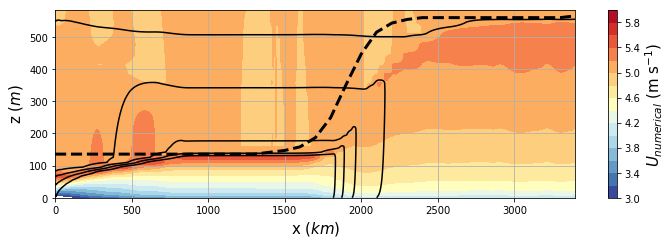

In [7]:
plt.figure()
plt.rcParams['figure.figsize'] = 10, 3.5
# Coloarbar settings (change at will)
# default is to match meso-NH output colorbars
#-- Number of colors
ncolors = 15. 
# --- max and min value of the colorbar
max = 6 
min = 3 

indice_max = 30 
indice_min = 0
X, Y = np.meshgrid(data.XHAT[indice_min:]*0.001, data.ZHAT[1:indice_max])

#/end colorbar settings

#-- Do not change
dl = (max-min)/ncolors

levelsa = np.arange(min,max+dl,dl)
CSa = plt.contourf(X,Y, data.UT.values[1:indice_max,0,indice_min:], levelsa, cmap='RdYlBu_r') 
cbar = plt.colorbar()
cbar.set_label(r'$U_{numerical}$ (m s$^{-1}$)', fontsize='15')

tlevels = [288.5, 289, 289.5, 290, 290.5]
plt.contour(X,Y, data.THT.values[1:indice_max,0,indice_min:], colors='black', levels=tlevels)

plt.xlabel(r'x $(km)$', fontdict={'fontsize':15})
plt.ylabel(r'z $(m)$', fontdict={'fontsize':15})

plt.xlim([0,3400])

plt.plot(xmodel, (Nboundary)*var.DZ, 'k--', linewidth=3)


plt.tight_layout()
plt.grid()

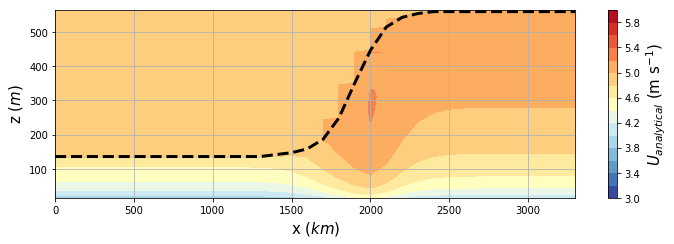

In [31]:
plt.figure()
plt.rcParams['figure.figsize'] = 10, 3.5
# Coloarbar settings (change at will)
# default is to match meso-NH output colorbars
#-- Number of colors
ncolors = 15. 
# --- max and min value of the colorbar
max = 6 
min = 3 

indice_max = 30 #40
indice_min = 800
#/end colorbar settings

#-- Do not change
dl = (max-min)/ncolors

levelsa = np.arange(min,max+dl,dl)
CSa = plt.contourf(Xm,Ym, Uana, levelsa, cmap='RdYlBu_r') 
cbar = plt.colorbar()
cbar.set_label(r'$U_{analytical}$ (m s$^{-1}$)', fontsize='15')
plt.plot(xmodel, (Nboundary)*var.DZ, 'k--', linewidth=3)

plt.ylim([15,565])
plt.xlim([0,3300])

plt.xlabel(r'x $(km)$', fontdict={'fontsize':15})
plt.ylabel(r'z $(m)$', fontdict={'fontsize':15})
plt.tight_layout()
plt.grid()


(0, 3400)

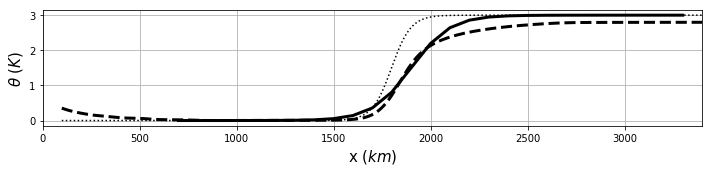

In [8]:
gap = 3.
N_x = 45
dx = 100000.
plt.rcParams['figure.figsize'] = 10, 2.5

indice_min = 100

# analytical model SST
plt.plot(xmodel[7:-1], var.SST[8:-1], 'k-', linewidth='3')

# numerical model SST
plt.plot(data.XHAT[indice_min:-1]*0.001 , data.SST.values[0,indice_min:-1] - data.SST.values[0,1], 'k:')

# numerical model temperature
plt.plot(data.XHAT[indice_min:-10]*0.001, data.THT.values[0,0,indice_min:-10] - np.amin(data.THT.values), 'k--', 
         linewidth=3)

plt.xlabel(r'x $(km)$', fontdict={'fontsize':15})
plt.ylabel(r'$\theta$ $(K)$', fontdict={'fontsize':15})
plt.tight_layout()
plt.grid()

plt.xlim([0,3400])

## Figure 4

(0, 3400)

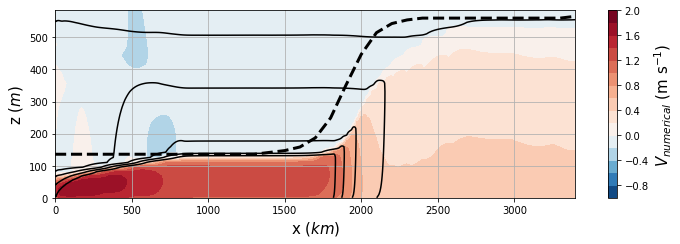

In [25]:
plt.figure()
plt.rcParams['figure.figsize'] = 10, 3.5
# Coloarbar settings (change at will)
# default is to match meso-NH output colorbars
#-- Number of colors
ncolors = 15. 
# --- max and min value of the colorbar
max = 2#
min = -1

#center the colormap
orig_cmap = cm.RdBu_r
shift = 1 - float(max) / (max + abs(min))
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=shift, name='shifted')

indice_max = 30 #30#40
indice_min = 0

X, Y = np.meshgrid(data.XHAT[indice_min:]*0.001, data.ZHAT[1:indice_max])

#/end colorbar settings

#-- Do not change
dl = (max-min)/ncolors

levelsa = np.arange(min,max+dl,dl)
CSa = plt.contourf(X,Y, data.VT.values[1:indice_max,0,indice_min:], levelsa, cmap=shifted_cmap) 
cbar = plt.colorbar()
cbar.set_label(r'$V_{numerical}$ (m s$^{-1}$)', fontsize='15')
tlevels = [288.5, 289, 289.5, 290, 290.5]
plt.contour(X,Y, data.THT.values[1:indice_max,0,indice_min:], colors='black', levels=tlevels)

plt.xlabel(r'x $(km)$', fontdict={'fontsize':15})
plt.ylabel(r'z $(m)$', fontdict={'fontsize':15})

plt.tight_layout()
plt.grid()

plt.plot(xmodel, (Nboundary)*var.DZ, 'k--', linewidth=3)


plt.xlim([0,3400])


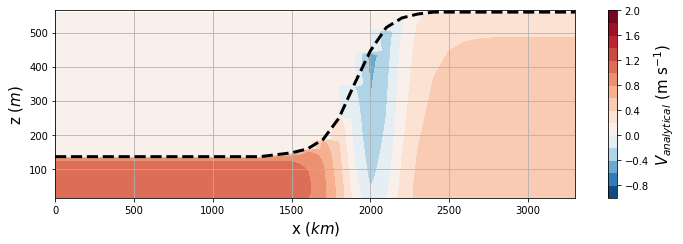

In [12]:
plt.figure()
plt.rcParams['figure.figsize'] = 10, 3.5
# Coloarbar settings (change at will)
# default is to match meso-NH output colorbars
#-- Number of colors
ncolors = 15. 
# --- max and min value of the colorbar
max = 2#
min = -1

#center the colormap
orig_cmap = cm.RdBu_r
shift = 1 - float(max) / (max + abs(min))
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=shift, name='shifted')

indice_max = 30 #30#40
indice_min = 800

#/end colorbar settings

#-- Do not change
dl = (max-min)/ncolors

levelsa = np.arange(min,max+dl,dl)
CSa = plt.contourf(Xm,Ym, Vana, levelsa, cmap=shifted_cmap) 
cbar = plt.colorbar()
cbar.set_label(r'$V_{analytical}$ (m s$^{-1}$)', fontsize='15')

plt.plot(xmodel, (Nboundary)*var.DZ, 'k--', linewidth=3)

plt.ylim([15,565])
plt.xlim([0,3300])

plt.xlabel(r'x $(km)$', fontdict={'fontsize':15})
plt.ylabel(r'z $(m)$', fontdict={'fontsize':15})

plt.tight_layout()
plt.grid()


In [26]:
# diffusion coefficient computation in the LES 
#(following a mixing length scheme implemented in Meso-NH)
K_model = (data.TKET**(0.5)* data.LM*0.1264)

In [27]:
# diffusion coefficient computation in the analytical solution
# K = A + B*(z-h) + C*(z-h)**2
# where z_h = z-h.
z_h = np.outer(np.ones(35), np.arange(0,100, 1))*var.DZ -   np.outer(Nboundary*0.5, np.ones(100))*var.DZ


K_ana =( np.outer(var.A, np.ones(100)) + np.outer(var.B, np.ones(100))* z_h + 
                     np.outer(var.C, np.ones(100))* z_h**2) 

In [28]:
xmodel

array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
        900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
       1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
       2700., 2800., 2900., 3000., 3100., 3200., 3300., 3400.])

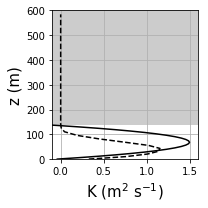

In [36]:
# Plots verticals profiles of K for the analytical solution
# and the model at different positions

# GRID point in the analytical model 
xana = 0
# POSITION (in km) in the numerical model
xmodel = 1000

plt.figure()
plt.rcParams['figure.figsize'] = 3., 3


plt.plot(K_model.sel(X=xmodel, Z=slice(1,30)), data.ZHAT[1:30], 'k--')
plt.plot(K_ana[xana,:], zmodel, 'k-')

plt.xlim([-0.1,1.6])#1.6
plt.ylim([0,600])

plt.axhspan((Nboundary[xana])*var.DZ,600, color='grey', alpha=0.4, lw=0)

plt.ylabel('z (m)', fontsize=15)
plt.xlabel(r'K (m$^2$ s$^{-1}$)', fontsize=15)

plt.grid()
plt.tight_layout()

#plt.savefig('K_profile' + str(xmodel) + '.eps')

## Additional plot: profiles of TKE in the analytical model
## at different positions

Text(0,0.5,'z $(m)$')

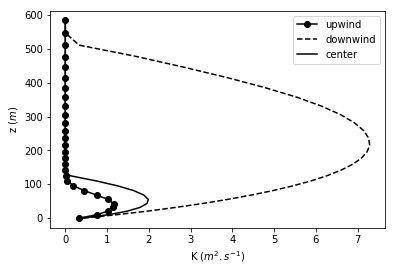

In [7]:
plt.figure()
plt.plot(K_model.sel(X=1000, Z=slice(1,30)), data.ZHAT[1:30], 'ko-', label='upwind')
plt.plot(K_model.sel(X=3550, Z=slice(1,30)), data.ZHAT[1:30], 'k--', label='downwind')
plt.plot(K_model.sel(X=1800, Z=slice(1,30)), data.ZHAT[1:30 ], 'k-', label='center')
plt.legend()

plt.xlabel(r'K $(m^2 . s^{-1})$')
plt.ylabel(r'z $(m)$')

## Figure 5

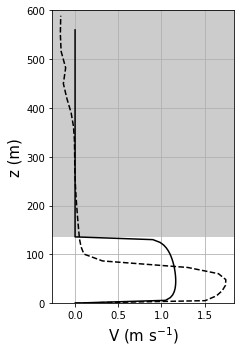

In [38]:
plt.figure()
plt.rcParams['figure.figsize'] = 3.5, 5

plt.plot(np.append(np.array([0]), data.VT.values[1:indice_max,0,200]), 
         np.append(np.array([0]), data.ZHAT[1:indice_max] + 5), 'k--')
plt.plot(Vana[:,0], zmodel,  'k-')

plt.axhspan((Nboundary[0])*var.DZ,600, color='grey', alpha=0.4, lw=0)


plt.xlabel(r'V (m s$^{-1}$)', fontsize='15')
plt.ylabel(r'z (m)', fontsize='15')

plt.grid()
plt.ylim([0,600])
plt.tight_layout()
#plt.savefig('V_200.eps')

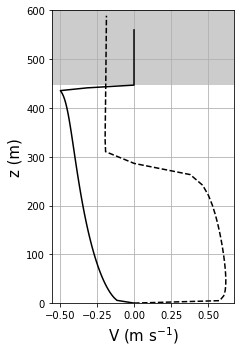

In [14]:
plt.figure()
plt.rcParams['figure.figsize'] = 3.5, 5

plt.plot(np.append(np.array([0]), data.VT.values[1:indice_max,0,2000]), 
         np.append(np.array([0]), data.ZHAT[1:indice_max] + 5), 'k--')
plt.plot(Vana[:,20], zmodel,  'k-')
plt.axhspan((Nboundary[20])*var.DZ,600, color='grey', alpha=0.4, lw=0)


plt.xlabel(r'V (m s$^{-1}$)', fontsize='15')
plt.ylabel(r'z (m)', fontsize='15')

plt.grid()
plt.ylim([0,600])
plt.tight_layout()
plt.savefig('V_2000.eps')

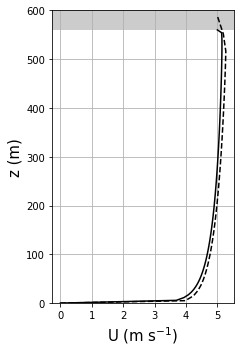

In [20]:
plt.figure()
plt.rcParams['figure.figsize'] = 3.5, 5

plt.plot(np.append(np.array([0]), data.UT.values[1:indice_max,0,3000]), 
         np.append(np.array([0]), data.ZHAT[1:indice_max] + 5), 'k--')
plt.plot(Uana[:,30], zmodel,  'k-')
plt.axhspan((Nboundary[30])*var.DZ,600, color='grey', alpha=0.4, lw=0)


plt.xlabel(r'U (m s$^{-1}$)', fontsize='15')
plt.ylabel(r'z (m)', fontsize='15')

plt.grid()
plt.ylim([0,600])
plt.tight_layout()
plt.savefig('U_3000.eps')

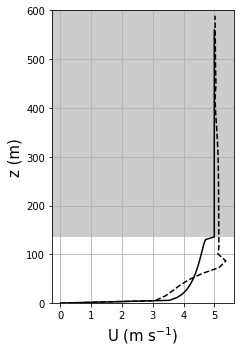

In [17]:
plt.figure()
plt.rcParams['figure.figsize'] = 3.5, 5

plt.plot(np.append(np.array([0]), data.UT.values[1:indice_max,0,200]), 
         np.append(np.array([0]), data.ZHAT[1:indice_max] + 5), 'k--')
plt.plot(Uana[:,0], zmodel,  'k-')
plt.axhspan((Nboundary[0])*var.DZ,600, color='grey', alpha=0.4, lw=0)


plt.xlabel(r'U (m s$^{-1}$)', fontsize='15')
plt.ylabel(r'z (m)', fontsize='15')

plt.grid()
plt.ylim([0,600])
plt.tight_layout()
plt.savefig('U_200.eps')

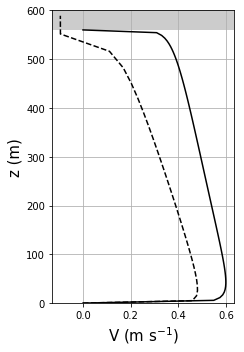

In [15]:
plt.figure()
plt.rcParams['figure.figsize'] = 3.5, 5

plt.plot(np.append(np.array([0]), data.VT.values[1:indice_max,0,3000]), 
         np.append(np.array([0]), data.ZHAT[1:indice_max] + 5), 'k--')
plt.plot(Vana[:,30], zmodel,  'k-')
plt.axhspan((Nboundary[30])*var.DZ,600, color='grey', alpha=0.4, lw=0)


plt.xlabel(r'V (m s$^{-1}$)', fontsize='15')
plt.ylabel(r'z (m)', fontsize='15')

plt.grid()
plt.ylim([0,600])
plt.tight_layout()
plt.savefig('V_3000.eps')

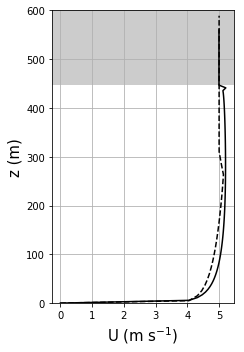

In [18]:
plt.figure()
plt.rcParams['figure.figsize'] = 3.5, 5

plt.plot(np.append(np.array([0]), data.UT.values[1:indice_max,0,2000]), 
         np.append(np.array([0]), data.ZHAT[1:indice_max] + 5), 'k--')
plt.plot(Uana[:,20], zmodel,  'k-')
plt.axhspan((Nboundary[20])*var.DZ,600, color='grey', alpha=0.4, lw=0)


plt.xlabel(r'U (m s$^{-1}$)', fontsize='15')
plt.ylabel(r'z (m)', fontsize='15')

plt.grid()
plt.ylim([0,600])
plt.tight_layout()
plt.savefig('U_2000.eps')

## Figure 6

In [40]:
# Compute the B height in the numerical model: the height where the V wind cancels

bl_height_model = np.zeros((3602,))

for i in xrange(bl_height_model.shape[0]):

    bl_height_model[i] = np.amin(np.where(data.VT.values[:,0,i]<=0.))
bl_height_model = bl_height_model.astype('int')

In [46]:
# Compute the dimensionless numbers in the analytical model

gSST = np.gradient(var.SST[1:], var.dx)

Ke_ana = (1./3)*var.Kmax + (1./6)*(var.K_0 + var.K_1)

Ek_ana = 2 * np.pi**2 * Ke_ana / ((Nboundary*var.DZ)**2 * 10**(-4))
Pc_ana = 9.9 * Nboundary*var.DZ * gSST / (280 * 10**(-4) * 5) 

In [42]:
# Compute the dimensionless numbers in the numerical model

minin = 500
maxin = -10

Ke = np.trapz(K_model.values[:,0,minin:maxin], data.ZHAT.values, axis=0)/data.ZHAT.values[bl_height_model[minin:maxin]]

Ek = (2 * np.pi**2 * Ke/ 
      (data.ZHAT.values[bl_height_model[minin:maxin]]**2 * 10**(-4)) )

gSST =  np.gradient(data.SST.values[0,minin:maxin], data.X.values[minin:maxin])


theta0 = 280

pc = 9.8 * data.ZHAT.values[bl_height_model[minin:maxin]] * gSST/ (theta0 * 10**(-4) * 5)

In [43]:
import numpy as np
####Fonction de lissage
def lissage(Lx, Ly,p):
    '''Smooths a function by moving average over 2p+1 points 
    
    Inputs:
    
    Lx: input x-axis
    Ly: input function values over x-axis
    p: smooting parameter
    
    Output:
    
    The smoothed function and the associated x-axis
    '''

    Lyout=[]
    Lxout = Lx[p: -p]
    for index in range(p, len(Ly)-p):
        average = np.mean(Ly[index-p : index+p+1])
        Lyout.append(average)
    return Lxout,Lyout

In [44]:
p=100
X_liss, Ek_liss =lissage(data.X.values[minin:maxin], Ek, p)
P_liss, Pc_liss = lissage(data.X.values[minin:maxin], pc, 20)

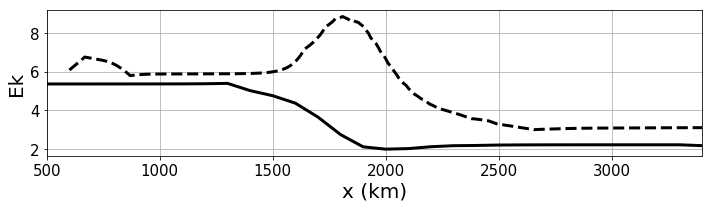

In [51]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.figsize'] = (10, 3)

minx = 100
maxx = -100
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

ax1.plot(X_liss, Ek_liss, 'k--', linewidth=3)
ax1.plot(xmodel, Ek_ana, 'k-', linewidth=3)
#ax2.plot(P_liss, Pc_liss, 'k--', linewidth=2)
#ax2.plot(xmodel, Pc_ana, 'k--', linewidth=1)

xmodel = np.arange(0, 35*dx, dx)/1000
plt.xlim([500,3400])
ax1.set_xlabel('x (km)', fontsize='20')
ax1.set_ylabel('Ek', fontsize='20')
#ax2.set_ylabel(r"Pc", fontsize=20)
#ax1.set_ylim([-0.000001, 0.000001])

ax1.grid()
plt.tight_layout()
#plt.savefig('dimensionless.eps')

# Figure 7

In [59]:
#numerical model divergence
#import scipy.integrate.trapz as trapz

UTmean = data.UT

dudx = np.gradient(UTmean.values[:,0,:], data.X.values*1000, axis = 1) 
div_data = data.XHAT.values[:-1]
    
for i in xrange(div_data.shape[0]):
    div_data[i] = np.trapz(dudx[:bl_height_model[i], i], data.ZHAT.values[:bl_height_model[i]])

In [60]:
p = 200
X_liss, div_liss =lissage(data.X.values, div_data, p)
div_liss = np.array(div_liss)

In [63]:
#analytical model divergence

Nx = wind.shape[1]

dudxm = np.gradient(np.real(wind), dx, axis = 1) 
div_mod = np.zeros(wind.shape[1])
    
for i in xrange(div_mod.shape[0]):
    div_mod[i] = np.trapz(dudxm[:Nboundary[i], i], x=None, dx=dz)

In [68]:
#height of the BL in m for the numerical and analytical models

deltamodel = data.ZHAT.values[bl_height_model]
deltaanaly = Nboundary * dz


# laplacian of SST
laplac = np.gradient(np.gradient(data.SST.values[0,:], data.X.values * 1000), data.X.values*1000)

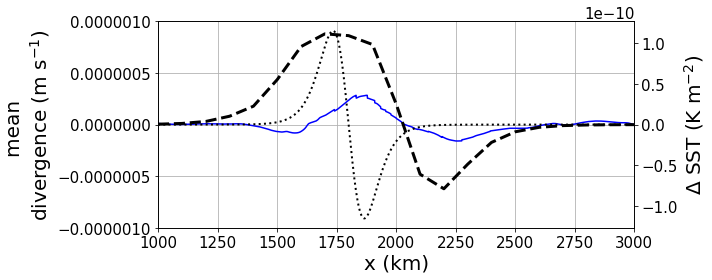

In [70]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.figsize'] = (10, 4)

minx = 100
maxx = -100
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(data.X.values[minx+ 2 + p :maxx - p], div_liss[minx+1:maxx]/deltamodel[minx + 2 + p :maxx-p], 'b-')
ax2.plot(data.X.values[minx+1:maxx], laplac[minx+1:maxx], 'k:', linewidth=2)
xmodel = np.arange(0, 35*dx, dx)/1000
ax1.plot(xmodel, div_mod/deltaanaly, 'k--', linewidth=3)
plt.xlim([1000,3000])
ax1.set_xlabel('x (km)', fontsize='20')
ax1.set_ylabel("mean \n" r'divergence (m s$^{-1}$)', fontsize='20')
ax2.set_ylabel(r"$\Delta$ SST (K m$^{-2}$)", fontsize=20)
ax1.set_ylim([-0.000001, 0.000001])

ax1.grid()
plt.tight_layout()
plt.savefig('divergence' + str(p) + '.eps')

# Additional figure: wind stress at the surface

it is computed at the first model level

In [73]:
import bin.var_5 as param

In [228]:
param.DZ
#-> on calcule la tension de vent au premier niveau 20.²

5.656564340259106

In [74]:
#----Diffusion coefficient parametrization:
K_1 = param.K_1
Kmax = param.Kmax
K_0 = param.K_0
SST = param.SST
N_x = param.N_x
dx = param.dx
#--Number of vertical points
N_z = param.N_z

height = 10

#----MABL height
delta = param.delta
#--- a is half the total BL height (used for convenience):
a = 0.5*delta

#--- SST gradient:
DT = (SST[1:] - SST[:-1])/dx

#-----derivative of delta w.r.t. theta
Ddelta = param.Ddelta

#----- Horizonal discretization
dz = np.max(delta)/(N_z -1)      
t = (delta/dz) +1

#--- Number of points in the MABL
N = np.floor(t).astype(int) 

#--- Other parametrization (see appendix): C*Z**2 + B*Z + A = K(z)

A = Kmax
B = (K_1 - K_0)/delta
C = 2*(K_0 + K_1 - 2*Kmax)/(delta**2)

K_ana = C*(height - a)**2 + B*(height-a) + A 

tau_ana = 1.2* K_ana * wind.real[1,] / height

In [76]:
# analytical model
SST_model = data.SST.values[0,:]
K = (data.TKET.values**(0.5)* data.LM.values*0.1264)

UT = data.UT.values

tau_model = 1.2 * K[2,0,:] * (UT[2, 0, :] - UT[1, 0, :]) / 10  
tau_model = 1.2 * K[2,0,:] * UT[2, 0, :]/20

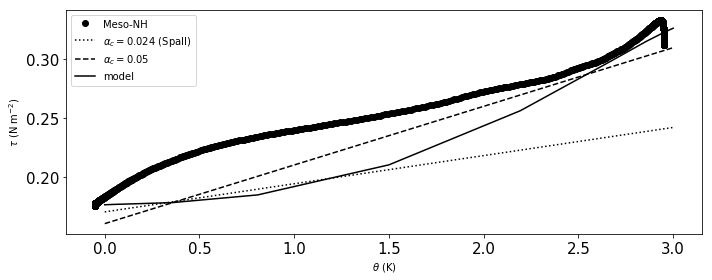

In [77]:
plt.plot(SST_model[800:-1000] - 287.5, tau_model[800:-1000], 'ko', label='Meso-NH')
#plt.plot(SST_model[800:-1000] - 287.5, stress[800:-1000], 'bo', label='Meso-NH')

plt.plot(SST[1:], SST[1:]*0.024 + 0.17, 'k:', label=r'$\alpha_c = 0.024$ (Spall)')
#plt.plot(SST[1:], SST[1:]*0.08 + 0.25, 'k--')
plt.plot(SST[1:], SST[1:]*0.05 + 0.16, 'k--', label=r'$\alpha_c = 0.05$')

plt.plot(SST[1:], tau_ana, 'k-', label='model')


plt.xlabel(r'$\theta$ (K)')
plt.ylabel(r'$\tau$ (N m$^{-2}$)')
plt.legend()

plt.tight_layout()
plt.savefig('surface_stress.eps')
